In [39]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import UnivariateSpline

import scipy.misc
def inverse(f, domain=(0.0, 1.0-1e-6), extrapolate=(float("NaN"), float("NaN"))):
    def inner(x):
        if f(domain[0]) >= x:
            return extrapolate[0]
        if f(domain[1]) <= x:
            return extrapolate[1]
        else:
            try:
                return scipy.optimize.brentq(lambda y: f(y)-x, a=domain[0], b=domain[1])
            except ValueError:
                return float("NaN")

    return np.vectorize(inner)

def derivative(f, dx=1e-6):
    return np.vectorize(lambda x: scipy.misc.derivative(f, x, dx))


In [45]:
p = [0.0, 0.2,  0.3,  0.4,  0.5,  0.6,  0.8,  1.0]
L = [0.0, 0.04, 0.09, 0.16, 0.25, 0.36, 0.64, 1.0]
ymean = 10.0

Derivative at 0: 1.9801978869793148e-16
Derivative at 1: 2.000000000002


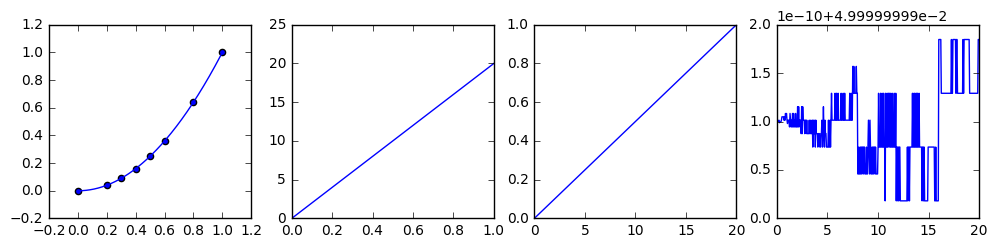

In [55]:
##########################################
plt.rcParams["figure.figsize"] = (12,2.5)
fig, ax = plt.subplots(1, 4)
##########################################

spline = UnivariateSpline(p,L,k=5,s=0)

print("Derivative at 0:", derivative(spline)(0))
print("Derivative at 1:", derivative(spline)(1))

x = np.linspace(0.0, 1.0, 1000)
y = np.linspace(0.0, 50, 1000)

ax[0].scatter(p, L)
ax[0].plot(x, spline(x))

spline_quantile = lambda p: ymean * spline.derivative()(p)
ax[1].plot(x, spline_quantile(x))

spline_cdf = inverse(spline_quantile)
ax[2].plot(y, spline_cdf(y))

spline_pdf = derivative(spline_cdf)
ax[3].plot(y, spline_pdf(y))

Derivative at 0: 2.7762420964943967e-15
Derivative at 1: 2.000000000002


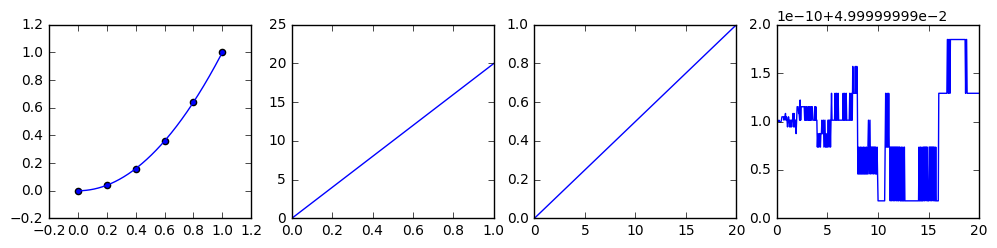

In [42]:
##########################################
plt.rcParams["figure.figsize"] = (12,2.5)
fig, ax = plt.subplots(1, 4)
##########################################

pstar = p
Lstar = L

# Left tail, minimum
#pstar = [-0.2,-0.1]+pstar
#Lstar = [-0.02,-0.01]+Lstar

# Right tail, maximum
#pstar = pstar+[1.1,1.2]
#Lstar = Lstar+[1.4,1.8]

spline = UnivariateSpline(pstar,Lstar,k=5,s=0)

print("Derivative at 0:", derivative(spline)(0))
print("Derivative at 1:", derivative(spline)(1))

x = np.linspace(0.0, 1.0, 1000)
y = np.linspace(0.0, 50, 1000)

ax[0].scatter(p, L)
ax[0].plot(x, spline(x))

spline_quantile = lambda p: ymean * spline.derivative()(p)
ax[1].plot(x, spline_quantile(x))

spline_cdf = inverse(spline_quantile)
ax[2].plot(y, spline_cdf(y))

spline_pdf = derivative(spline_cdf)
ax[3].plot(y, spline_pdf(y))

In [27]:
pstart

NameError: name 'pstart' is not defined

In [31]:
L

[0.0, 0.04, 0.16, 0.36, 0.64, 1.0]

In [29]:
Lstar

[-0.02, -0.01, 0.0, 0.04, 0.16, 0.36, 0.64, 1.0]